## Decision Tree Classifier Implementation
This notebook is a part of an assignment where I implement Decision-Tree Classifier Algorithm for three different types of datasets. 

### Overview
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure. In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.


In [1]:
!pip install pydotplus

### Example 1:

Here we build a simple dataset of dimention 11*2. 

In [29]:
#importing the libraries
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pydotplus

#importing decision-tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [10]:
#creating the dataset

data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [11]:
data.shape

(11, 2)

In [12]:
#sorting in ascending order
data.sort_values("Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [22]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [23]:
#implementing the decision-tree algorithm

age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)

tree_graph_to_png(
    age_tree,
    feature_names=["Age"],
    png_file_to_save="topic3_decision_tree2.png",
)



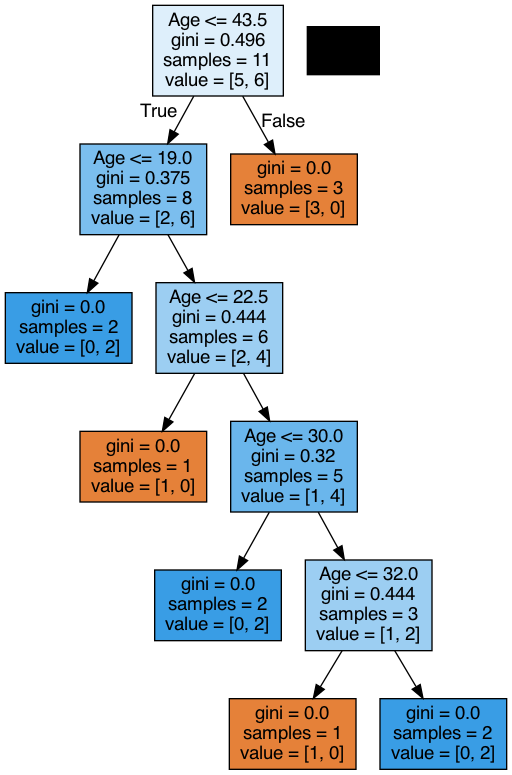


### Example 2:
For example 2, we add salary to the previous data to make our data a little more complex.

In [24]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [26]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values);

tree_graph_to_png(
    tree=age_sal_tree,
    feature_names=["Age", "Salary"],
    png_file_to_save="topic3_decision_tree3.png",
)

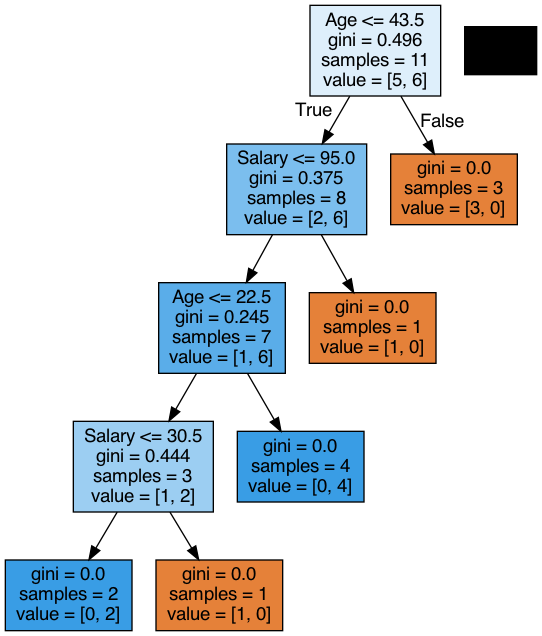

### Example 3:
Now, we will build a decision tree to predict diabetes for subjects in the Pima Indians dataset based on predictor variables such as age, blood pressure, and bmi. A subset of the Pima Indians data from the UCI Machine Learning Repository is a built-in dataset in the MASS library. The Pima data in MASS contains 768 complete records from the original dataset. These 768 records have been broken down into two dataframes: Train dataframe has 80% and Test dataframe has 20% of total subjects. Since we are focusing on the implementatio of decision tree algorithm, all records with zeros that don’t make sense have been cleaned out of these dataset.

In [73]:
#importing the dataset
df=pd.read_csv("diabetes.csv")
df.sample(10)
df.shape

(768, 9)

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


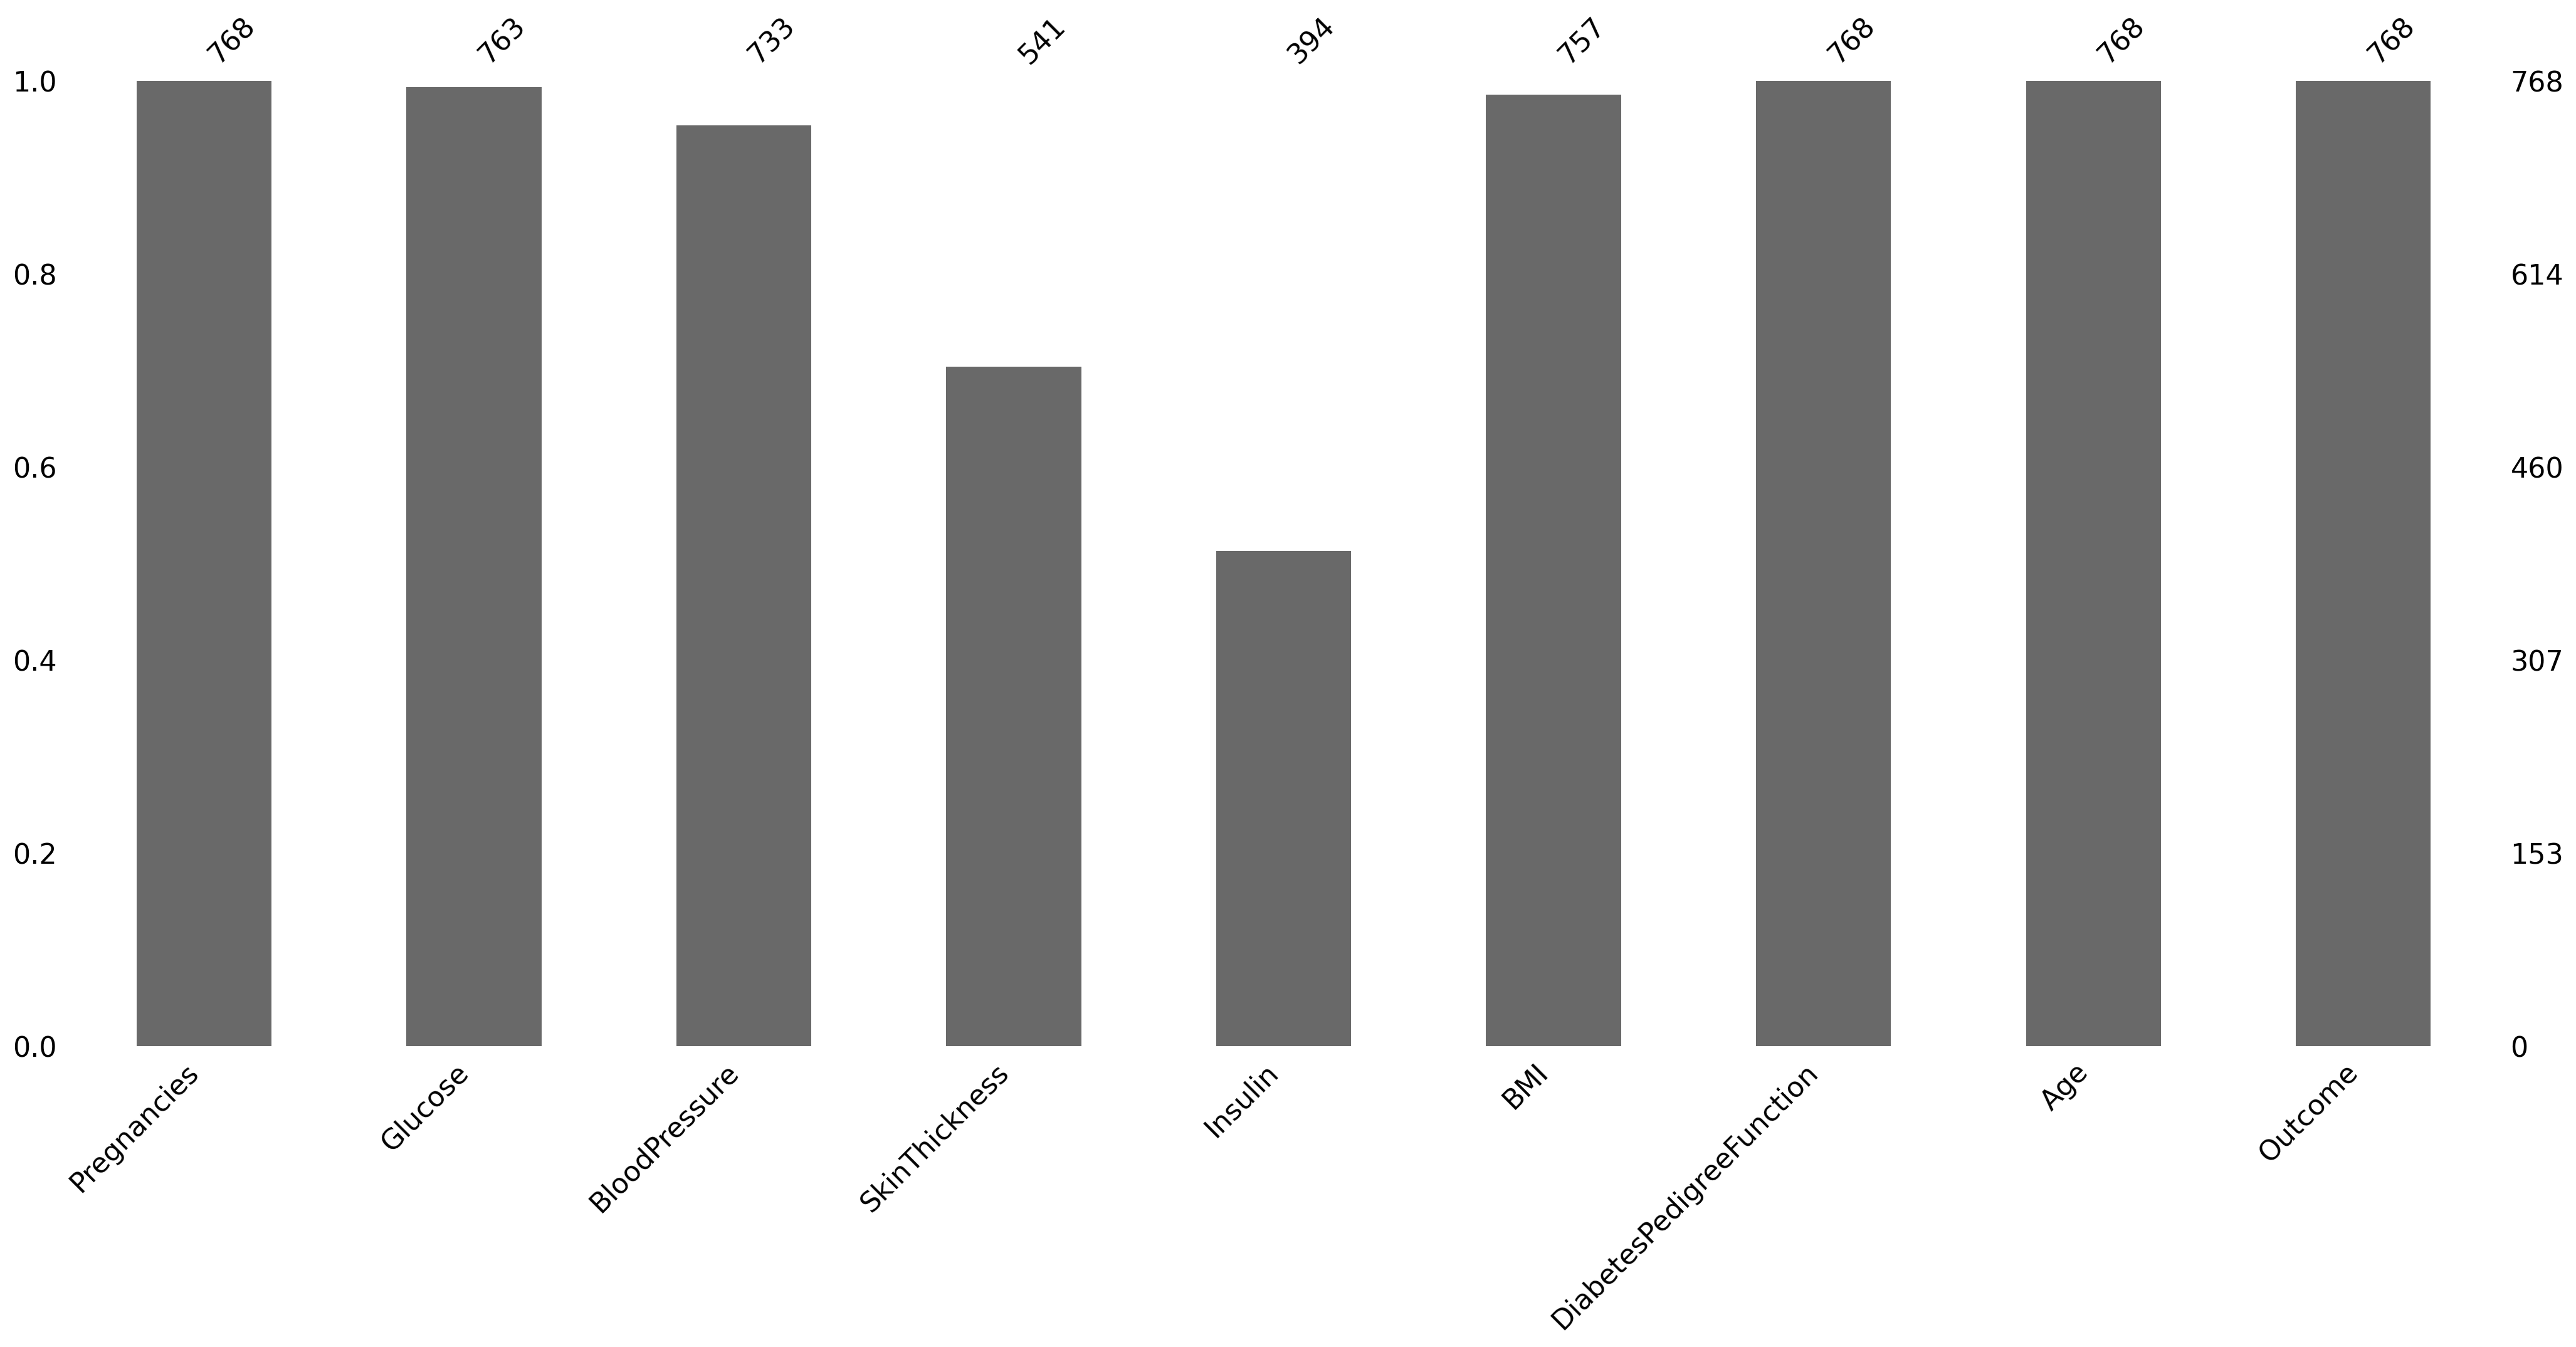

In [75]:
column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[column] = df[column].replace(0, np.nan)
plot = msno.bar(df)
plt.show()

Here, I drop the columns 'SkinThickness' and 'Insulin' because they have comparatively more number of null values than other features. Since we are focusing on the implementation of the algorithm, it doesnot matter for now.

In [76]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
48,7,103.0,66.0,32.0,NaN,39.1,0.344,31,1
446,1,100.0,72.0,12.0,70.0,25.3,0.658,28,0
694,2,90.0,60.0,NaN,NaN,23.5,0.191,25,0
156,2,99.0,52.0,15.0,94.0,24.6,0.637,21,0
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40,0
533,6,91.0,NaN,NaN,NaN,29.8,0.501,31,0
282,7,133.0,88.0,15.0,155.0,32.4,0.262,37,0
350,4,92.0,80.0,NaN,NaN,42.2,0.237,29,0
688,1,140.0,74.0,26.0,180.0,24.1,0.828,23,0
234,3,74.0,68.0,28.0,45.0,29.7,0.293,23,0


In [77]:
df.drop(['SkinThickness','Insulin'], axis=1, inplace=True)

In [78]:
df.isna().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [84]:
df.dropna(axis=0,inplace=True)
df.sample(20)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
488,4,99.0,72.0,25.6,0.294,28,0
486,1,139.0,62.0,40.7,0.536,21,0
147,2,106.0,64.0,30.5,1.400,34,0
748,3,187.0,70.0,36.4,0.408,36,1
711,5,126.0,78.0,29.6,0.439,40,0
457,5,86.0,68.0,30.2,0.364,24,0
487,0,173.0,78.0,46.5,1.159,58,0
43,9,171.0,110.0,45.4,0.721,54,1
402,5,136.0,84.0,35.0,0.286,35,1
513,2,91.0,62.0,27.3,0.525,22,0


In [85]:
df.shape

(724, 7)

In [86]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [88]:
#feature variables
x=df.drop(['Outcome'],axis=1)
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [89]:
#target variables
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

### Train-Test Splitting
We split the dataset into two different parts: Training set and testing set. 80% of data will be our training dataset while the rest 20% will be our testing set. 

In [91]:
#import train-test split funxtion
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=41) #20% data is used for testing and 80% is used for training.

In [92]:
#create Decision tree classifier object
model= DecisionTreeClassifier()

#Train the decision tree classifier
model=model.fit(x_train, y_train)

#predict the response for test dataset
y_pred = model.predict(x_test)

### Evaluation metrics

Let’s estimate, how accurately the classifier or model can predict the type of cultivars.Accuracy can be computed by comparing actual test set values and predicted values.
I have used two types of methods for accuracy calculation:

- Normal accuracy calculation by importing scikit-learn metrics module for accuracy calculation.

- Classification report by importing scikit-learn classification_report module.


In [93]:
#Evaluation using Accuracy score
from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 73.79310344827587


In [97]:
#Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[73, 17],
       [21, 34]])

In [96]:
print("Accuracy:", (73+34)/145)

Accuracy: 0.7379310344827587


### Visualization of the Decision Tree

In [99]:
tree_graph_to_png(
    tree=model,
    feature_names=x.columns,
    png_file_to_save="final_decision_tree.png",
)

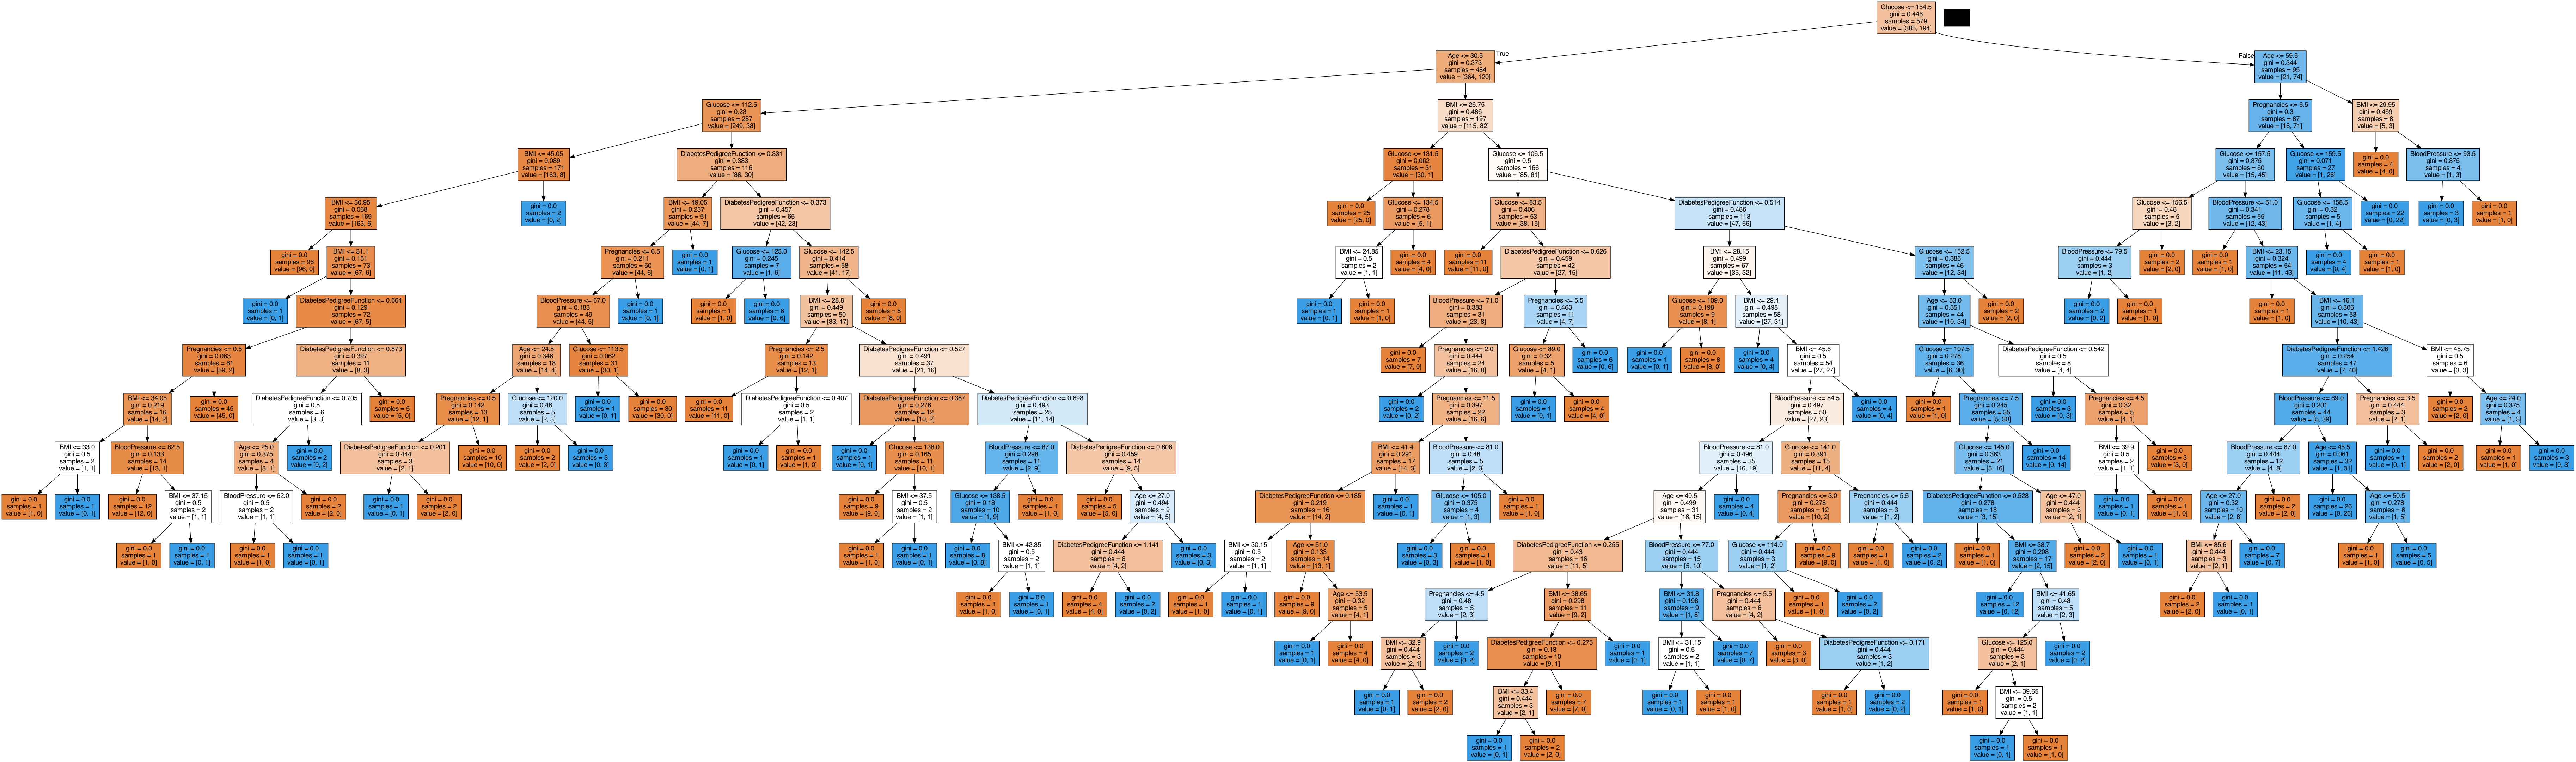